# **Extensive EDA for Superstore**
##### Python for Data Science (PDS) Project, March 2024
##### _Paridhi Arya, S20210020305_

The major objective of this section is to understand the general trends in the data, and gain some quick insights. Exploratory Data Analysis (EDA) is a fundamental step in understanding time series data, especially when the objective is to uncover general trends and gain quick insights. This phase heavily relies on visualizations using libraries like Matplotlib and Seaborn to extract meaningful information from the data.

In the context of our project on time series forecasting for the Superstore data, the primary goal of the EDA phase is to identify overarching patterns and initial observations without delving into complex analyses. Visualizations play a pivotal role in this process by providing a clear and intuitive representation of the data's characteristics.

During EDA, we will focus on utilizing visualizations to achieve the following objectives:

1. **Understanding General Trends:** Visualizations such as line charts or area plots will help us grasp the overall trends in sales for the "Furniture," "Technology," and "Office Supplies" categories over time. This includes identifying periods of growth, decline, seasonality, and any notable fluctuations.

2. **Detecting Seasonal Patterns:** We will use seasonal plots, seasonal subseries plots, or heatmaps to detect recurring patterns or seasonal variations within the data. This is crucial for understanding how sales behave across different seasons or time periods.

3. **Identifying Outliers and Anomalies:** Visualizations like box plots or scatter plots will be employed to detect outliers or anomalies in the data. These observations may indicate special events, errors, or irregularities that need further investigation.

4. **Assessing Stationarity:** Line plots with rolling statistics or trend lines can help assess the stationarity of the time series data. This involves checking for constant mean and variance over time, which is a fundamental assumption for many time series models.

5. **Exploring Correlations:** Correlation matrices and heatmap visualizations will be used to explore relationships between variables, such as sales figures for different categories or correlations between sales and external factors like promotions or holidays.

6. **Temporal Aggregation:** Visualizing aggregated data at different temporal resolutions (e.g., weekly, monthly) using bar charts or line plots can reveal broader trends and patterns that may not be apparent in raw data.

7. **Comparing Categories:** Side-by-side visualizations, such as grouped bar charts or overlaying line plots, will enable us to compare sales performance across different categories and identify any significant differences or similarities.

8. **Data Distribution:** Histograms or kernel density plots will be used to understand the distribution of sales data, including measures of central tendency and variability.

By leveraging these visualization techniques, we aim to gain quick but meaningful insights into the Superstore sales data, laying the groundwork for more in-depth analyses and forecasting models. Visualizations not only facilitate easier interpretation of complex data but also guide subsequent steps in data preprocessing, modeling, and validation.

## Loading Libraries
Since this section only aims at performing basic Exploratory Data Analysis (EDA), we will be loading only the basic libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Loading Data

Now, we load the data for the 'Superstore'

In [41]:
superstore = pd.read_excel('Superstore.xls')
superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## General EDA

In [42]:
superstore.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [43]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

Note: As we can see above, there are no null values and all values are in their correct formats. Now, we drop the unnecessary columns. 

In [44]:
superstore.drop(['Row ID', 'Product ID', 'Product Name'], inplace=True, axis=1)

## Analysis of Shipping Delays
First, we will be calculating the shipping delay i.e. the days that have passed from the order date till the shipping date.

In [7]:
superstore['Delays'] = superstore['Ship Date'] - superstore['Order Date']

So, we have data for 4 years from 2014 to 2017. We'll see the variation of these delays with time, Product, Customer Category, Ship Mode, and Profit.

#### I. Frequency Distribution

In [8]:
delay_freq = superstore.groupby('Delays')['Delays'].sum()
delay_freq_days = pd.DataFrame(delay_freq.values / np.timedelta64(1, 'D'), columns=['Freq'])
delay_freq_days['Day'] = delay_freq.index.days
delay_freq_days

,Freq,Day
0,0.0,0
1,369.0,1
2,2668.0,2
3,3015.0,3
4,11096.0,4
5,10845.0,5
6,7218.0,6
7,4347.0,7


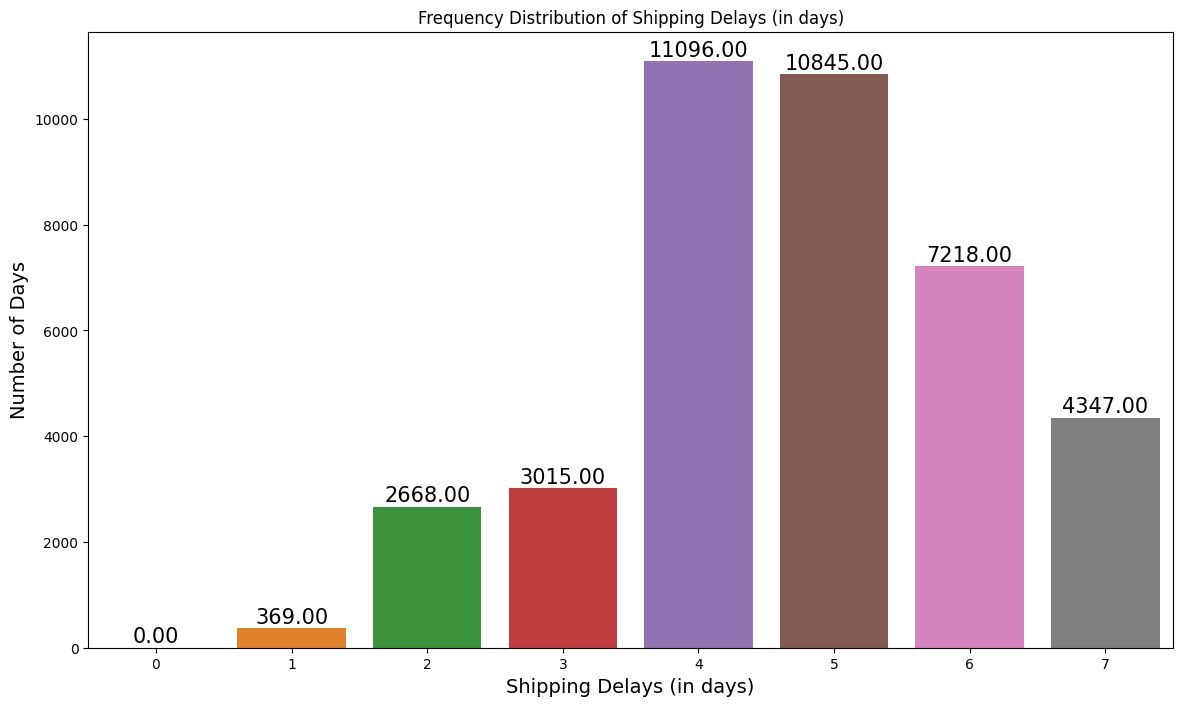

In [9]:
plt.figure(figsize=(14, 8))
plots = sns.barplot(x="Day", y="Freq", data=delay_freq_days)

for bar in plots.patches:
	plots.annotate(format(bar.get_height(), '.2f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', size=15, xytext=(0, 8), textcoords='offset points')

plt.xlabel("Shipping Delays (in days)", size=14)
plt.ylabel("Number of Days", size=14)
plt.title("Frequency Distribution of Shipping Delays (in days)")
plt.show()


_Inference_ : The most common shipping delay is 4 days, followed closely by 5-day shipping delay. Notably, there are no orders which were delivered on the same day.

#### II. Yearly Variation

In [10]:
by_delay = superstore.groupby('Order Date')['Delays'].sum().reset_index()
by_delay = by_delay.set_index('Order Date')
by_delay.head()

,Delays
Order Date,
2014-01-03,4 days
2014-01-04,12 days
2014-01-05,7 days
2014-01-06,31 days
2014-01-07,10 days


Text(0, 0.5, 'Shipping Delay (in days)')

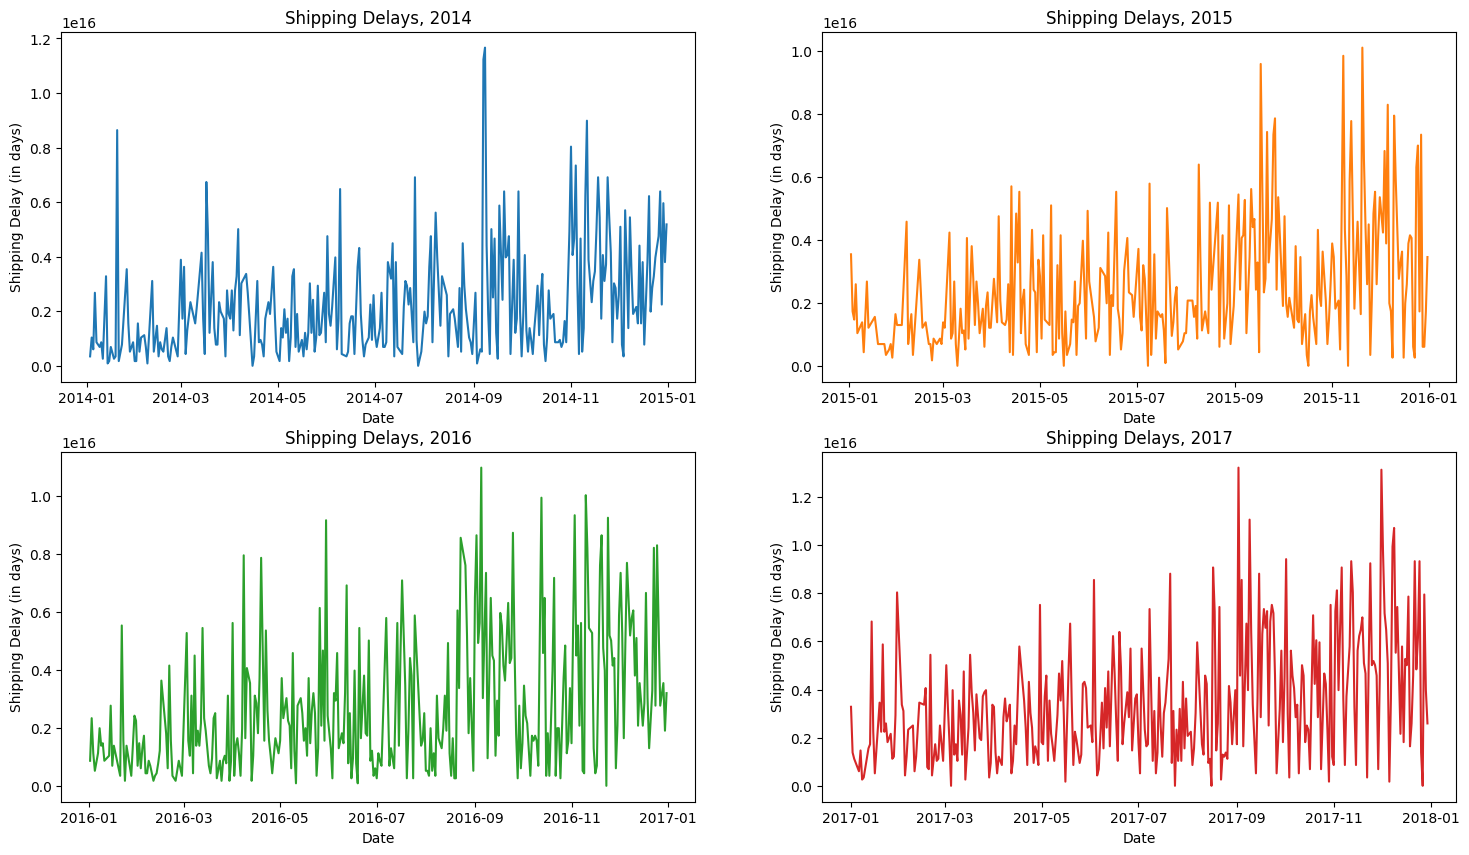

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(18, 10))
axs[0, 0].plot(by_delay.loc[by_delay.index.year == 2014].index, by_delay.loc[by_delay.index.year == 2014]['Delays'])
axs[0, 0].set_title('Shipping Delays, 2014')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Shipping Delay (in days)')
axs[0, 1].plot(by_delay.loc[by_delay.index.year == 2015].index, by_delay.loc[by_delay.index.year == 2015]['Delays'], 'tab:orange')
axs[0, 1].set_title('Shipping Delays, 2015')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('Shipping Delay (in days)')
axs[1, 0].plot(by_delay.loc[by_delay.index.year == 2016].index, by_delay.loc[by_delay.index.year == 2016]['Delays'],'tab:green')
axs[1, 0].set_title('Shipping Delays, 2016')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('Shipping Delay (in days)')
axs[1, 1].plot(by_delay.loc[by_delay.index.year == 2017].index, by_delay.loc[by_delay.index.year == 2017]['Delays'], 'tab:red')
axs[1, 1].set_title('Shipping Delays, 2017')
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('Shipping Delay (in days)')

_Inference_ : We can see a sharp spike in shipping delays in the 9th month (September), with a dip in the 10th-11th month (October - November) i.e. faster deliveries, with another smaller spike towards the end of the year.

#### III. Weekly Variation

In [12]:
superstore['Week'] = superstore['Order Date'].dt.day_of_week
superstore['Year'] = superstore['Order Date'].dt.year
weekly = superstore.groupby(['Week', 'Year'])['Delays'].sum().reset_index()
weekly

,Week,Year,Delays
0,0,2014,1716 days
1,0,2015,1472 days
2,0,2016,1798 days
3,0,2017,2575 days
4,1,2014,1396 days
5,1,2015,807 days
6,1,2016,1183 days
7,1,2017,1044 days
8,2,2014,852 days
9,2,2015,144 days


Text(0, 0.5, 'Shipping Delay (in days)')

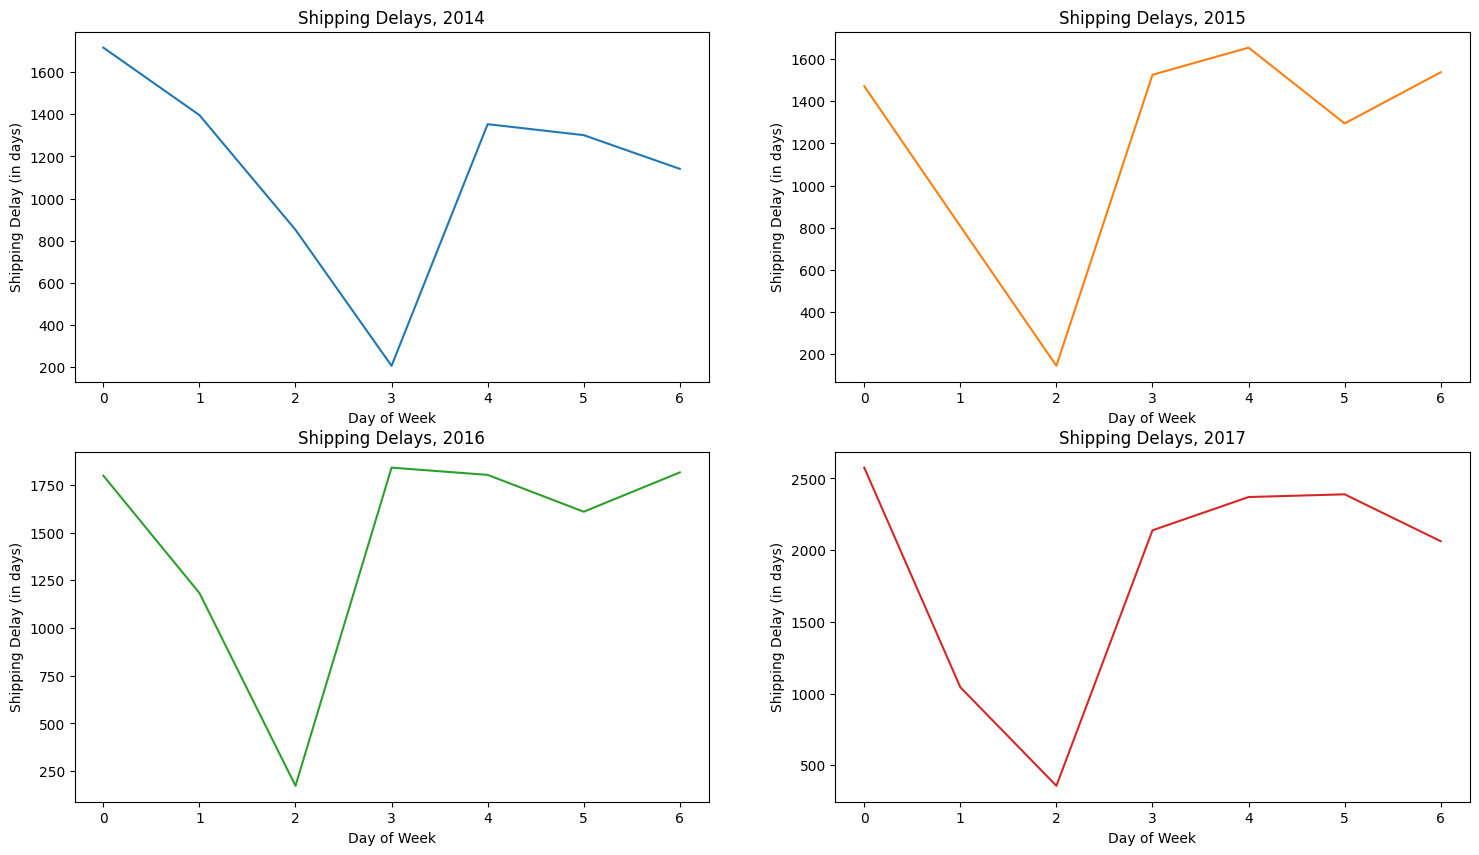

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(18, 10))
axs[0, 0].plot(weekly.loc[weekly.Year == 2014]['Week'], weekly.loc[weekly.Year == 2014]['Delays'].values/ np.timedelta64(1, 'D'))
axs[0, 0].set_title('Shipping Delays, 2014')
axs[0, 0].set_xlabel('Day of Week')
axs[0, 0].set_ylabel('Shipping Delay (in days)')
axs[0, 1].plot(weekly.loc[weekly.Year == 2015]['Week'], weekly.loc[weekly.Year == 2015]['Delays'].values/ np.timedelta64(1, 'D'), 'tab:orange')
axs[0, 1].set_title('Shipping Delays, 2015')
axs[0, 1].set_xlabel('Day of Week')
axs[0, 1].set_ylabel('Shipping Delay (in days)')
axs[1, 0].plot(weekly.loc[weekly.Year == 2016]['Week'], weekly.loc[weekly.Year == 2016]['Delays'].values/ np.timedelta64(1, 'D'), 'tab:green')
axs[1, 0].set_title('Shipping Delays, 2016')
axs[1, 0].set_xlabel('Day of Week')
axs[1, 0].set_ylabel('Shipping Delay (in days)')
axs[1, 1].plot(weekly.loc[weekly.Year == 2017]['Week'], weekly.loc[weekly.Year == 2017]['Delays'].values/ np.timedelta64(1, 'D'), 'tab:red')
axs[1, 1].set_title('Shipping Delays, 2017')
axs[1, 1].set_xlabel('Day of Week')
axs[1, 1].set_ylabel('Shipping Delay (in days)')

_Inference_ : We can notice that the lowest number of shipping delays are seen on day 2 (day 3 for 2014). For the rest of the days, we see that the delay is high on day 0, falls to a minima on day 2-3, then rises back up and stays almost consistent for the rest of the week.

#### IV. Variation with Product Category

In [14]:
idx = pd.IndexSlice
by_product = superstore.groupby(['Delays', 'Category'])['Category'].count()
by_product

Delays  Category       
0 days  Furniture           116
        Office Supplies     310
        Technology           93
1 days  Furniture            77
        Office Supplies     221
        Technology           71
2 days  Furniture           310
        Office Supplies     765
        Technology          259
3 days  Furniture           186
        Office Supplies     627
        Technology          192
4 days  Furniture           601
        Office Supplies    1660
        Technology          513
5 days  Furniture           466
        Office Supplies    1310
        Technology          393
6 days  Furniture           236
        Office Supplies     749
        Technology          218
7 days  Furniture           129
        Office Supplies     384
        Technology          108
Name: Category, dtype: int64

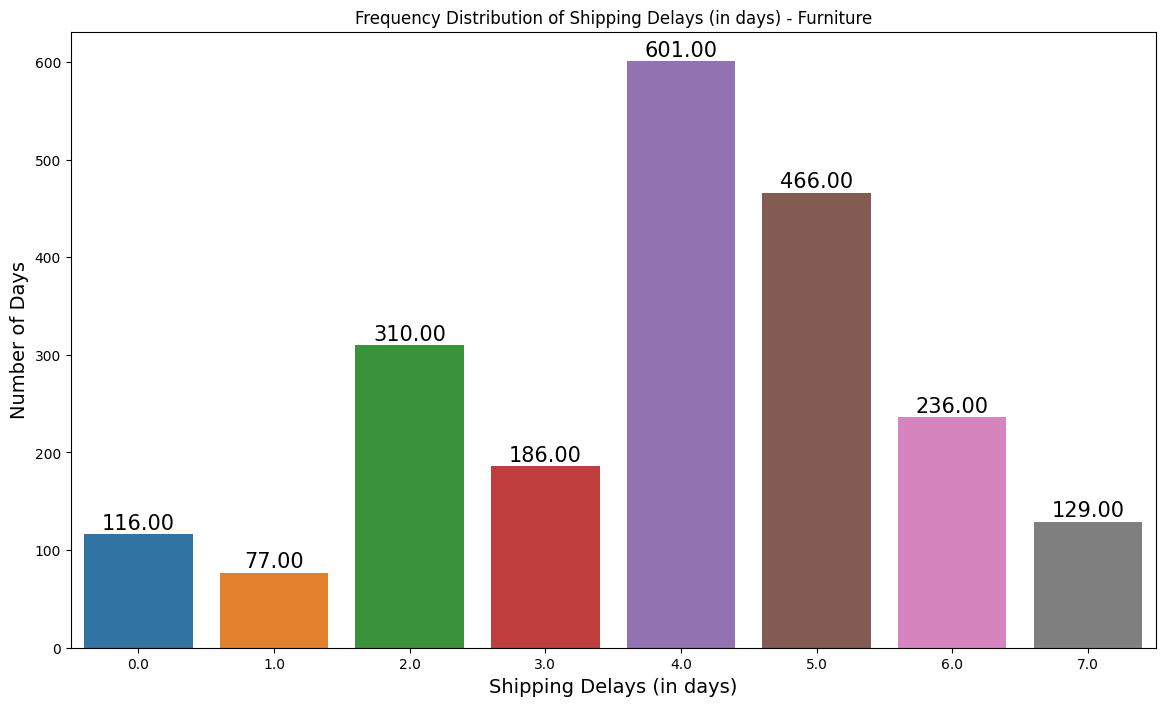

In [15]:
plt.figure(figsize=(14, 8))
plots = sns.barplot(x=by_product.loc[idx[:, 'Furniture']].index/np.timedelta64(1, 'D'), y=by_product.loc[idx[:, 'Furniture']].values)

for bar in plots.patches:
	plots.annotate(format(bar.get_height(), '.2f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', size=15, xytext=(0, 8), textcoords='offset points')

plt.xlabel("Shipping Delays (in days)", size=14)
plt.ylabel("Number of Days", size=14)
plt.title("Frequency Distribution of Shipping Delays (in days) - Furniture")
plt.show()

_Inference_ : Most of the Furniture gets delivered in 4 days, followed by 5 days. The least number of Furniture gets delivered in 1 day. Further, we also see a decreasing pattern of deliveries with shipping delays greater than 4.

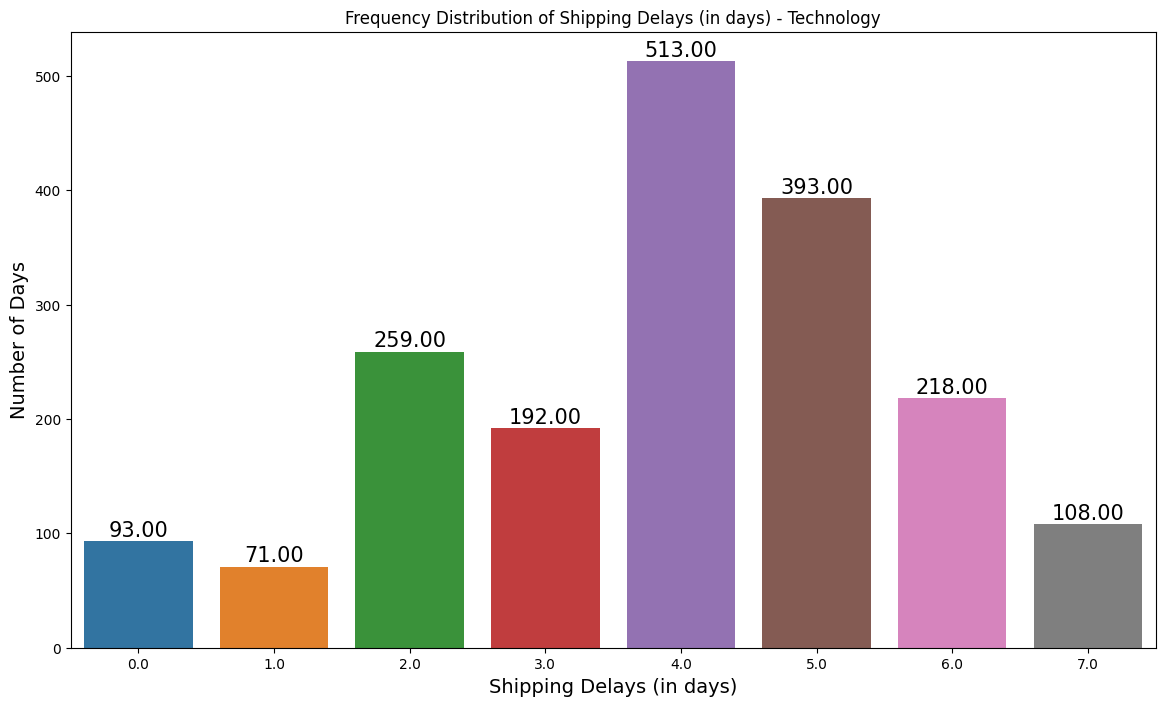

In [16]:
plt.figure(figsize=(14, 8))
plots = sns.barplot(x=by_product.loc[idx[:, 'Technology']].index/np.timedelta64(1, 'D'), y=by_product.loc[idx[:, 'Technology']].values)

for bar in plots.patches:
	plots.annotate(format(bar.get_height(), '.2f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', size=15, xytext=(0, 8), textcoords='offset points')

plt.xlabel("Shipping Delays (in days)", size=14)
plt.ylabel("Number of Days", size=14)
plt.title("Frequency Distribution of Shipping Delays (in days) - Technology")
plt.show()

_Inference_ : Most of the Technology items too get delivered in 4 days, followed by 5 days. Further, we also see a decreasing pattern of deliveries with shipping delays greater than 4. The least number of Technology items gets delivered in 1 day, just as Furniture.

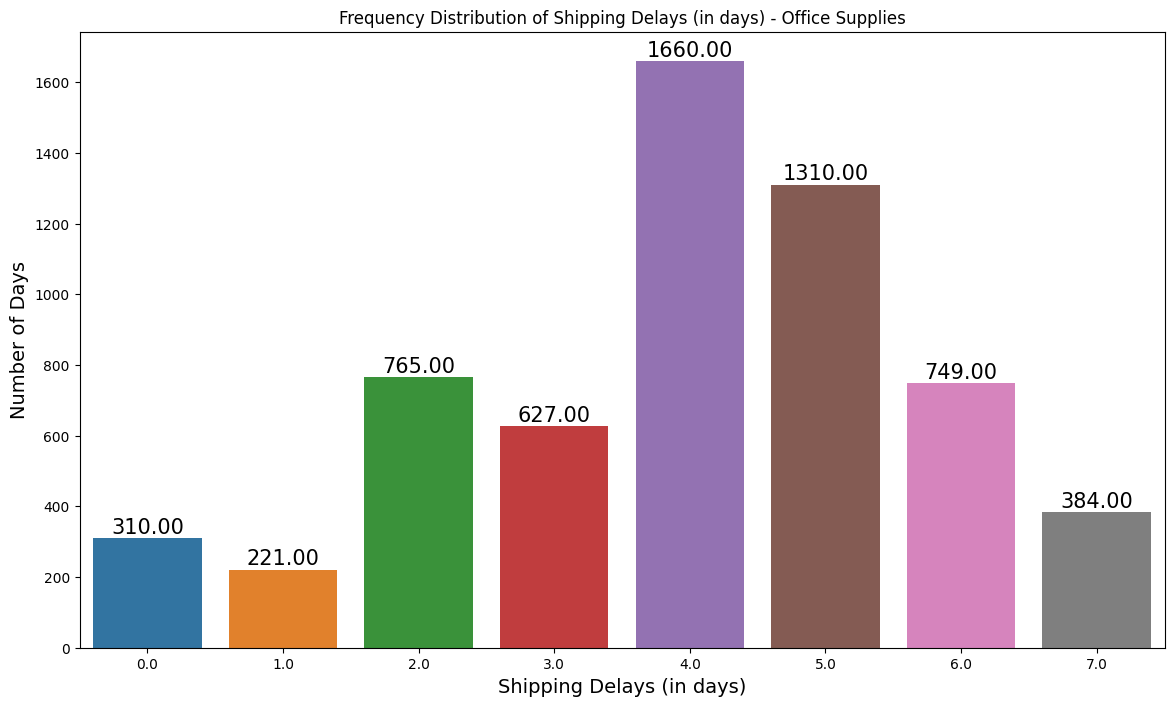

In [17]:
plt.figure(figsize=(14, 8))
plots = sns.barplot(x=by_product.loc[idx[:, 'Office Supplies']].index/np.timedelta64(1, 'D'), y=by_product.loc[idx[:, 'Office Supplies']].values)

for bar in plots.patches:
	plots.annotate(format(bar.get_height(), '.2f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', size=15, xytext=(0, 8), textcoords='offset points')

plt.xlabel("Shipping Delays (in days)", size=14)
plt.ylabel("Number of Days", size=14)
plt.title("Frequency Distribution of Shipping Delays (in days) - Office Supplies")
plt.show()

_Inference_ : Most of the Office Supplies too get delivered in 4 days, followed by 5 days. Further, we also see a decreasing pattern of deliveries with shipping delays greater than 4. The least number of Office Supplies gets delivered in 1 day, just as Furniture and Technology items.

#### V. Customer Category

In [18]:
by_consumer = superstore.groupby(['Segment', 'Delays'])['Delays'].sum()
by_consumer

Segment      Delays
Consumer     0 days      0 days
             1 days    199 days
             2 days   1370 days
             3 days   1563 days
             4 days   5504 days
             5 days   5640 days
             6 days   3876 days
             7 days   2310 days
Corporate    0 days      0 days
             1 days     94 days
             2 days    844 days
             3 days    993 days
             4 days   3428 days
             5 days   3445 days
             6 days   2004 days
             7 days   1295 days
Home Office  0 days      0 days
             1 days     76 days
             2 days    454 days
             3 days    459 days
             4 days   2164 days
             5 days   1760 days
             6 days   1338 days
             7 days    742 days
Name: Delays, dtype: timedelta64[ns]

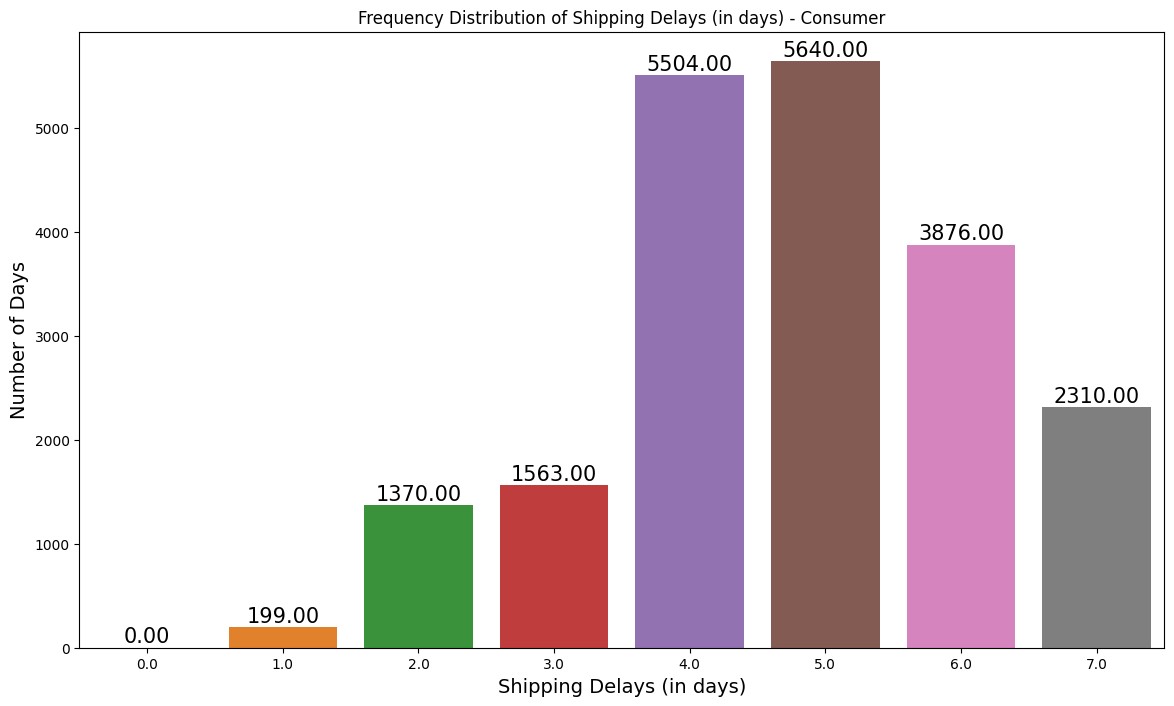

In [19]:
plt.figure(figsize=(14, 8))
plots = sns.barplot(x=by_consumer.loc[idx['Consumer', :]].index/np.timedelta64(1, 'D'), y=by_consumer.loc[idx['Consumer', :]].values/np.timedelta64(1, 'D'))

for bar in plots.patches:
	plots.annotate(format(bar.get_height(), '.2f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', size=15, xytext=(0, 8), textcoords='offset points')

plt.xlabel("Shipping Delays (in days)", size=14)
plt.ylabel("Number of Days", size=14)
plt.title("Frequency Distribution of Shipping Delays (in days) - Consumer")
plt.show()

_Inference_ : Most of the items get delivered in 5 days, followed by 4 days. Further, we also see a decreasing pattern of deliveries with shipping delays greater than 5. The least number of items get delivered in 0 days for Consumers.

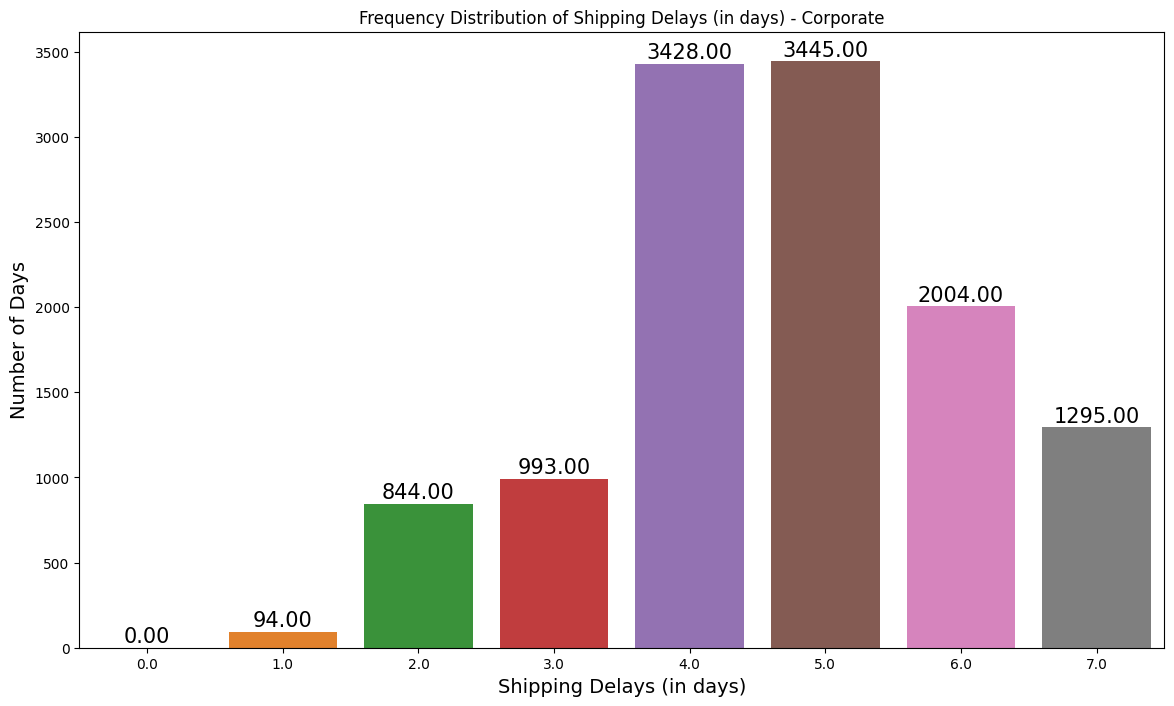

In [20]:
plt.figure(figsize=(14, 8))
plots = sns.barplot(x=by_consumer.loc[idx['Corporate', :]].index/np.timedelta64(1, 'D'), y=by_consumer.loc[idx['Corporate', :]].values/np.timedelta64(1, 'D'))

for bar in plots.patches:
	plots.annotate(format(bar.get_height(), '.2f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', size=15, xytext=(0, 8), textcoords='offset points')

plt.xlabel("Shipping Delays (in days)", size=14)
plt.ylabel("Number of Days", size=14)
plt.title("Frequency Distribution of Shipping Delays (in days) - Corporate")
plt.show()

_Inference_ : Most of the items get delivered in 5 days, followed by 4 days. Further, we also see a decreasing pattern of deliveries with shipping delays greater than 5. The least number of items get delivered in 0 days for Corporate.

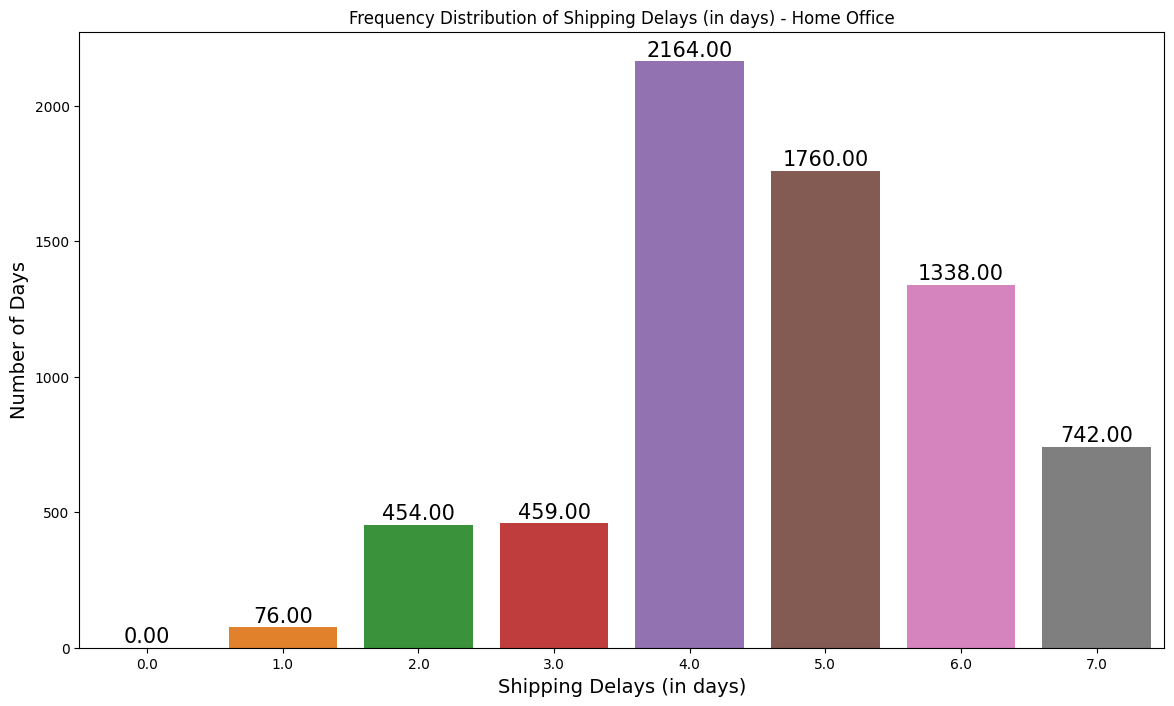

In [21]:
plt.figure(figsize=(14, 8))
plots = sns.barplot(x=by_consumer.loc[idx['Home Office', :]].index/np.timedelta64(1, 'D'), y=by_consumer.loc[idx['Home Office', :]].values/np.timedelta64(1, 'D'))

for bar in plots.patches:
	plots.annotate(format(bar.get_height(), '.2f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', size=15, xytext=(0, 8), textcoords='offset points')

plt.xlabel("Shipping Delays (in days)", size=14)
plt.ylabel("Number of Days", size=14)
plt.title("Frequency Distribution of Shipping Delays (in days) - Home Office")
plt.show()

_Inference_ : Most of the items get delivered in 4 days, followed by 5 days. Further, we also see a decreasing pattern of deliveries with shipping delays greater than 4. The least number of items get delivered in 0 days for Consumers.

_Overall Inference_: Most deliveries happen with a shipping delay of 4-5 dadys for most product categories and cistomer segments. 

#### VI. Variation with Shipping Mode

In [22]:
superstore.groupby(['Ship Mode', 'Delays'])['Delays'].sum()

Ship Mode       Delays
First Class     1 days    344 days
                2 days   1140 days
                3 days   1869 days
                4 days      4 days
Same Day        0 days      0 days
                1 days     24 days
Second Class    1 days      1 days
                2 days   1528 days
                3 days   1140 days
                4 days   1484 days
                5 days   2145 days
Standard Class  3 days      6 days
                4 days   9608 days
                5 days   8700 days
                6 days   7218 days
                7 days   4347 days
Name: Delays, dtype: timedelta64[ns]

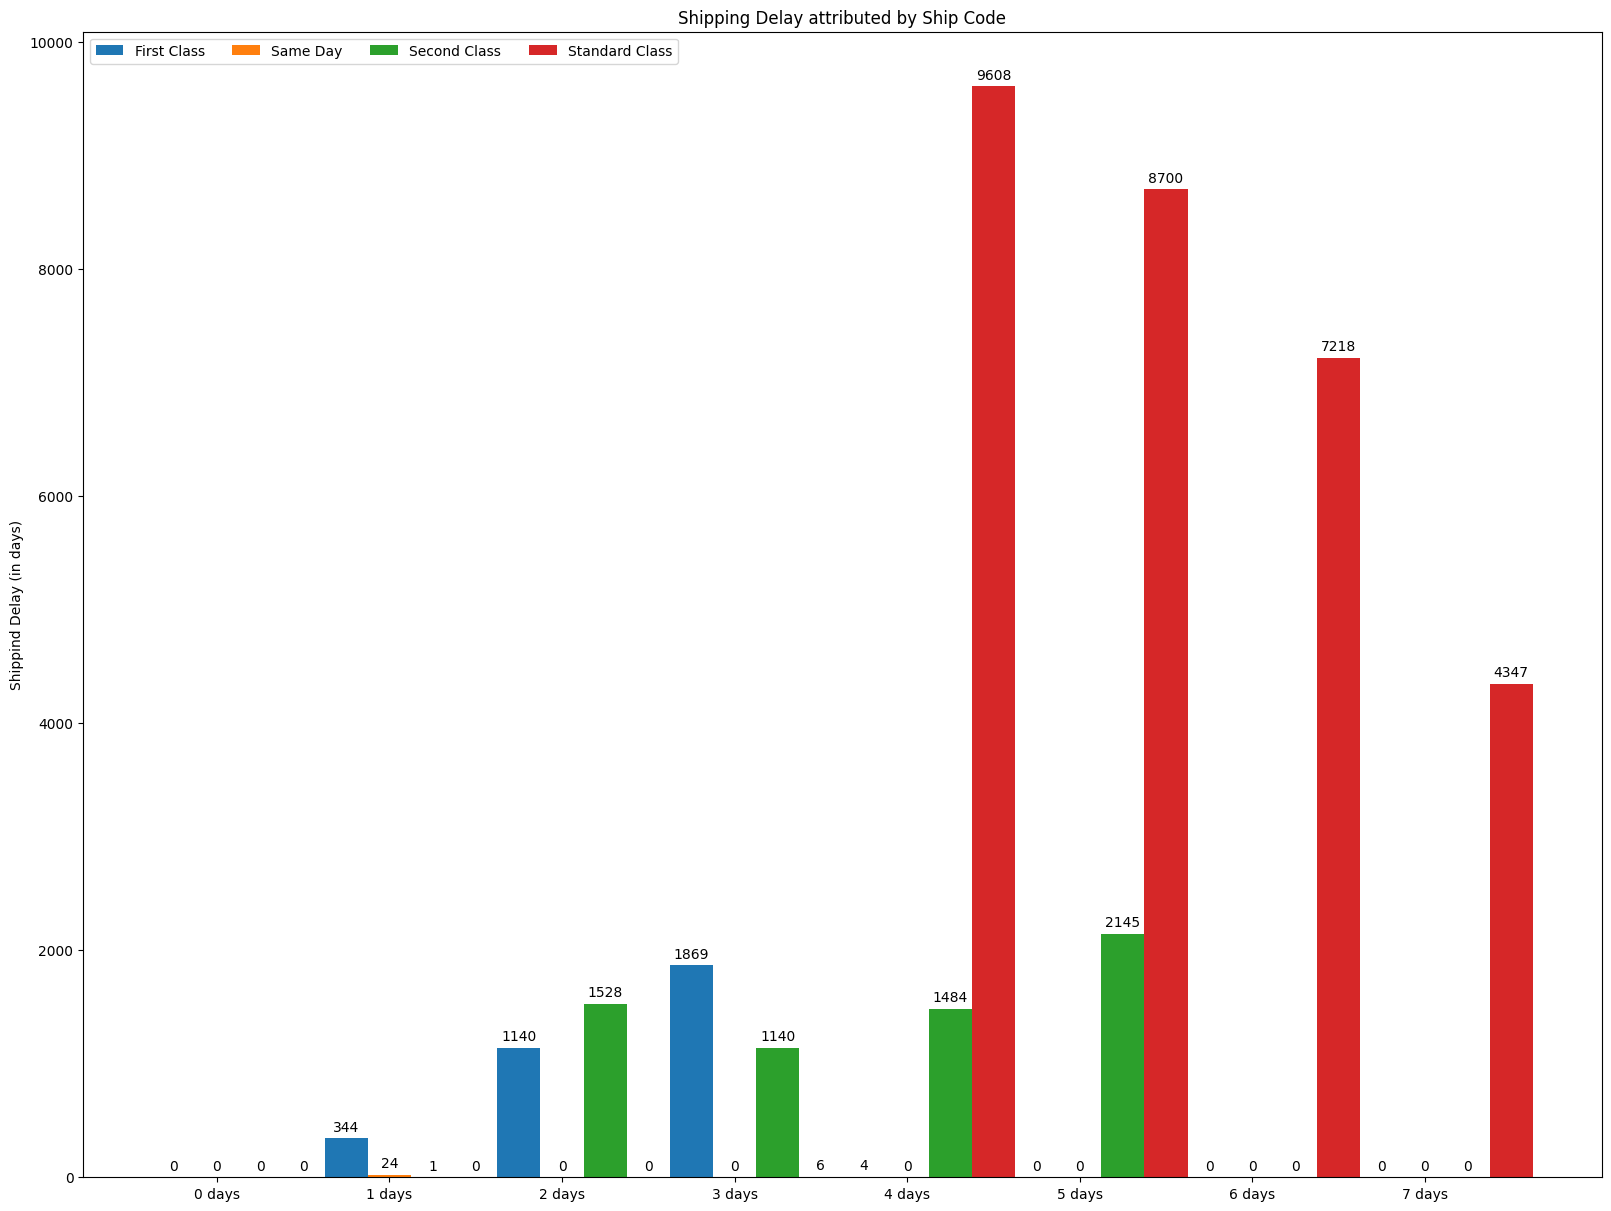

In [23]:
ship_code = ("0 days", "1 days", "2 days", "3 days", "4 days", "5 days", "6 days", "7 days")
penguin_means = {
    "First Class": (0, 344, 1140, 1869, 4, 0, 0, 0), 
    "Same Day": (0, 24, 0, 0, 0, 0, 0, 0),
    "Second Class": (0, 1, 1528, 1140, 1484, 2145, 0, 0),
    "Standard Class": (0, 0, 0, 6, 9608, 8700, 7218, 4347)
}

x = np.arange(len(ship_code))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(16, 12))

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Shippind Delay (in days)')
ax.set_title('Shipping Delay attributed by Ship Code')
ax.set_xticks(x + width, ship_code)
ax.legend(loc='upper left', ncols=4)

plt.show()

_Inference_ : 
- For first class ship mode, deliveries happen with a delay of 1-4 days, with most deliveries having a delay of 3 days
- For same day ship mode, deliveries happen either on the same day or the next day. As we can see, even in same day delivery, there is a delay of at least 1 day for all deliveries.
- For second class ship mode, deliveries happen with a delay of 1-5 days, with most deliveries having a delay of 5 days.
- liveries.
- For standard class ship mode, deliveries happen with a delay of 3-7 days, with most deliveries having a delay of 4 days. Counterintuitively, standard-class delivery has a higher probability of delivering faster than second-class.

### VII. Does Shipping Delay affect Profits? 

In [24]:
by_profit = superstore.groupby(['Delays'])['Profit'].sum()
by_profit

Delays
0 days    15385.9685
1 days     7541.2269
2 days    53118.1143
3 days    26875.9187
4 days    71134.7742
5 days    58733.2045
6 days    33275.9677
7 days    20331.8469
Name: Profit, dtype: float64

In [25]:
by_prof_scaled = by_profit/superstore.groupby(['Delays'])['Profit'].count()

Text(0.5, 1.0, 'Profits as a function of Shipping Delays')

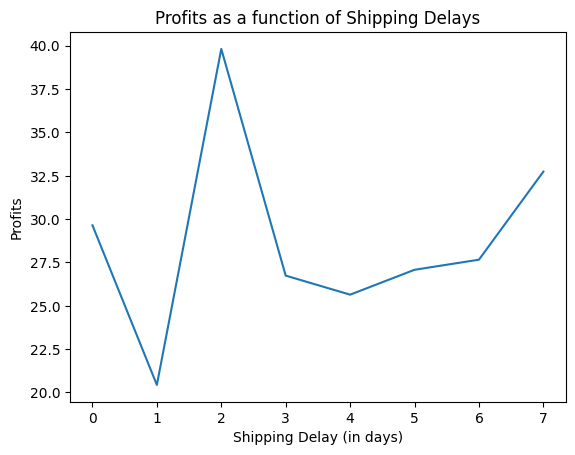

In [26]:
plt.plot(by_profit.index/np.timedelta64(1, 'D'), by_prof_scaled.values)
plt.xlabel('Shipping Delay (in days)')
plt.ylabel('Profits')
plt.title('Profits as a function of Shipping Delays')

_Inference_ : 
As we can see, counter-intuitively, 1 day shipping delay gives the least amount of profit to the superstore and the maximum profit is obtained with a shipping delay of 2 days.
Intuitively, after a shipping delay of 2 days the profit decreases as shipping delay increases but then shows an upwards trend after delay of 5 days.

Preferably, to maximize profits, the shipping delay should be of around 0 days, 2 days or 7 days.

### Analysis of Customer Segments

In [27]:
superstore['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

#### I. Analysis of Profits

<Axes: title={'center': 'Profit by Customer Segments'}, xlabel='Customer Segment', ylabel='Profit'>

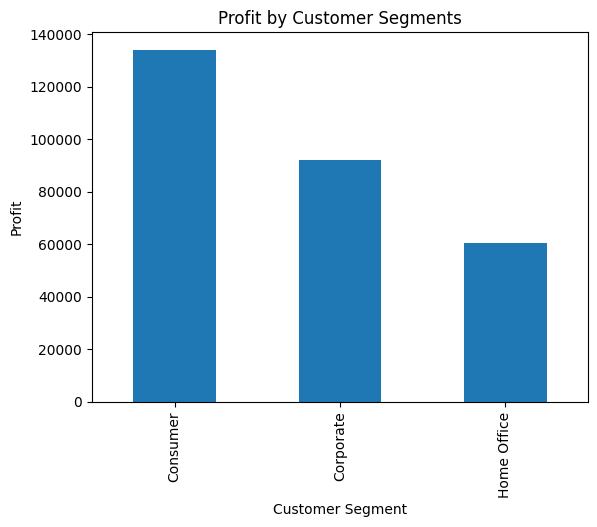

In [28]:
prof_by_segment = superstore.groupby('Segment')['Profit'].sum()
prof_by_segment.plot(kind='bar', xlabel="Customer Segment", ylabel="Profit", title="Profit by Customer Segments")

_Inference_ : As we can see from the graph above, the profit is the maximum for the consumer customer segment overall. 

<Axes: title={'center': 'Profit by Customer Segments'}, xlabel='Customer Segment', ylabel='Profit'>

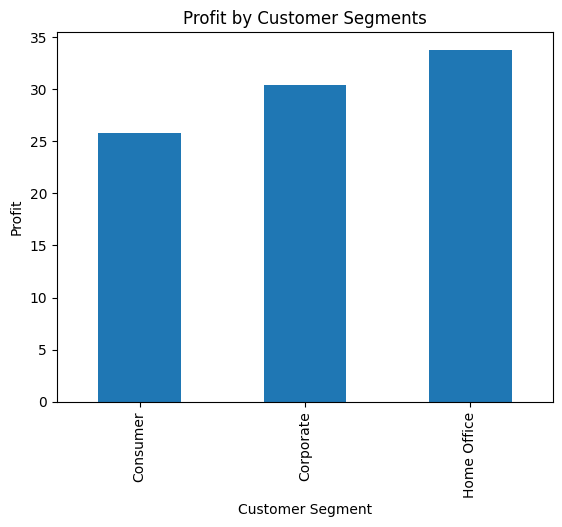

In [29]:
prof_by_segment_scaled = superstore.groupby('Segment')['Profit'].sum()/superstore.groupby('Segment')['Profit'].count()
prof_by_segment_scaled.plot(kind='bar', xlabel="Customer Segment", ylabel="Profit", title="Profit by Customer Segments")

_Inference_: However, when we scale down the profits by profits per purchase, then the Home Office supplies get the maximum profits (Rs 35/unit) per unit and consumers give the minimum profits per unit (Rs 25/unit)

#### II. Discounts by Segment

In [30]:
disc_by_segment = superstore.groupby(['Segment', 'Discount'])['Discount'].count()
#prof_by_segment.plot(kind='bar', xlabel="Customer Segment", ylabel="Profit", title="Profit by Customer Segments")
disc_by_segment

Segment      Discount
Consumer     0.00        2461
             0.10          50
             0.15          29
             0.20        1916
             0.30         132
             0.32          13
             0.40          96
             0.45           6
             0.50          37
             0.60          74
             0.70         210
             0.80         167
Corporate    0.00        1427
             0.10          27
             0.15          14
             0.20        1132
             0.30          55
             0.32          10
             0.40          74
             0.45           3
             0.50          17
             0.60          39
             0.70         135
             0.80          87
Home Office  0.00         910
             0.10          17
             0.15           9
             0.20         609
             0.30          40
             0.32           4
             0.40          36
             0.45           2
             0.50 

[Text(0.5, 0, 'Discount'),
 Text(0, 0.5, 'Number of Purchases'),
 Text(0.5, 1.0, 'Discounts Given Per Purchase - Home Office')]

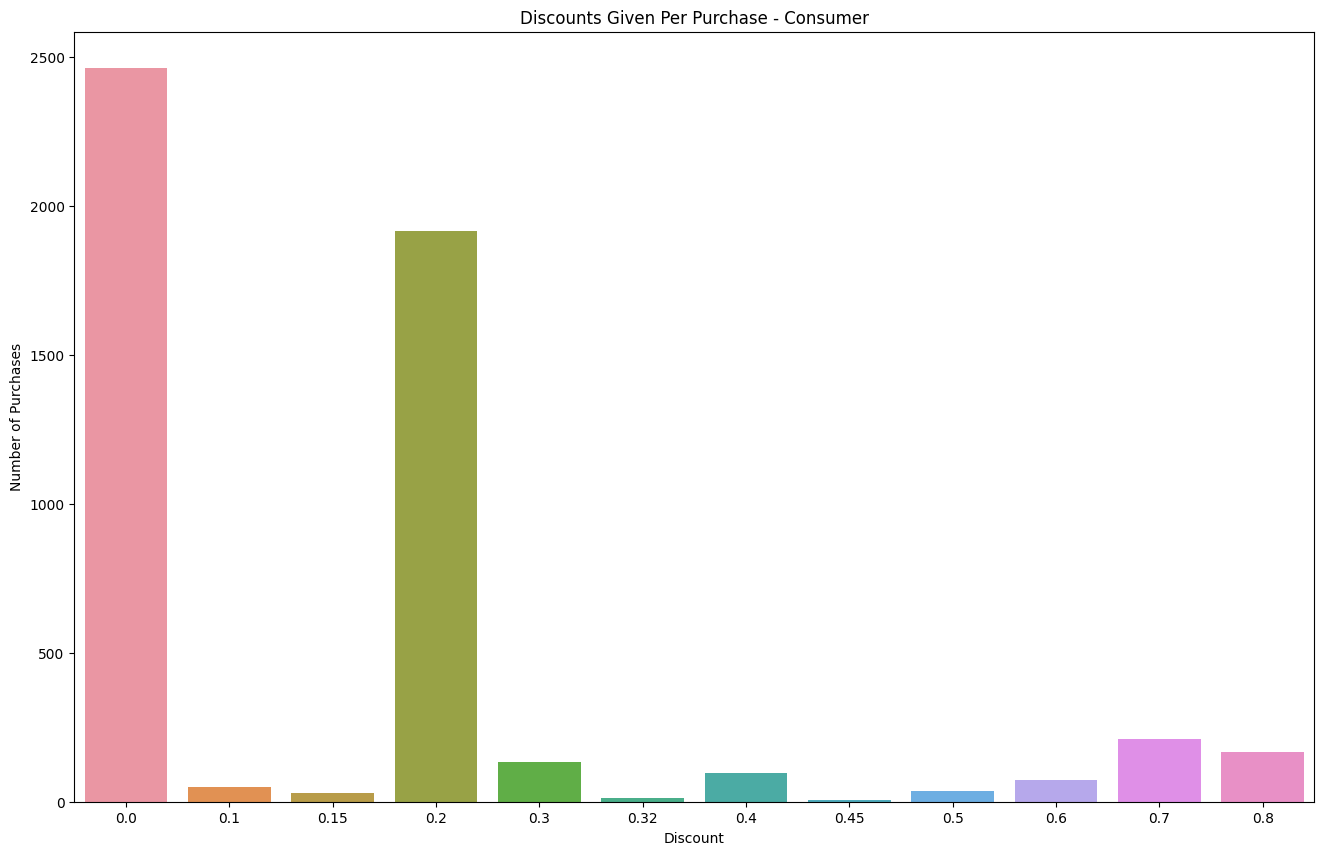

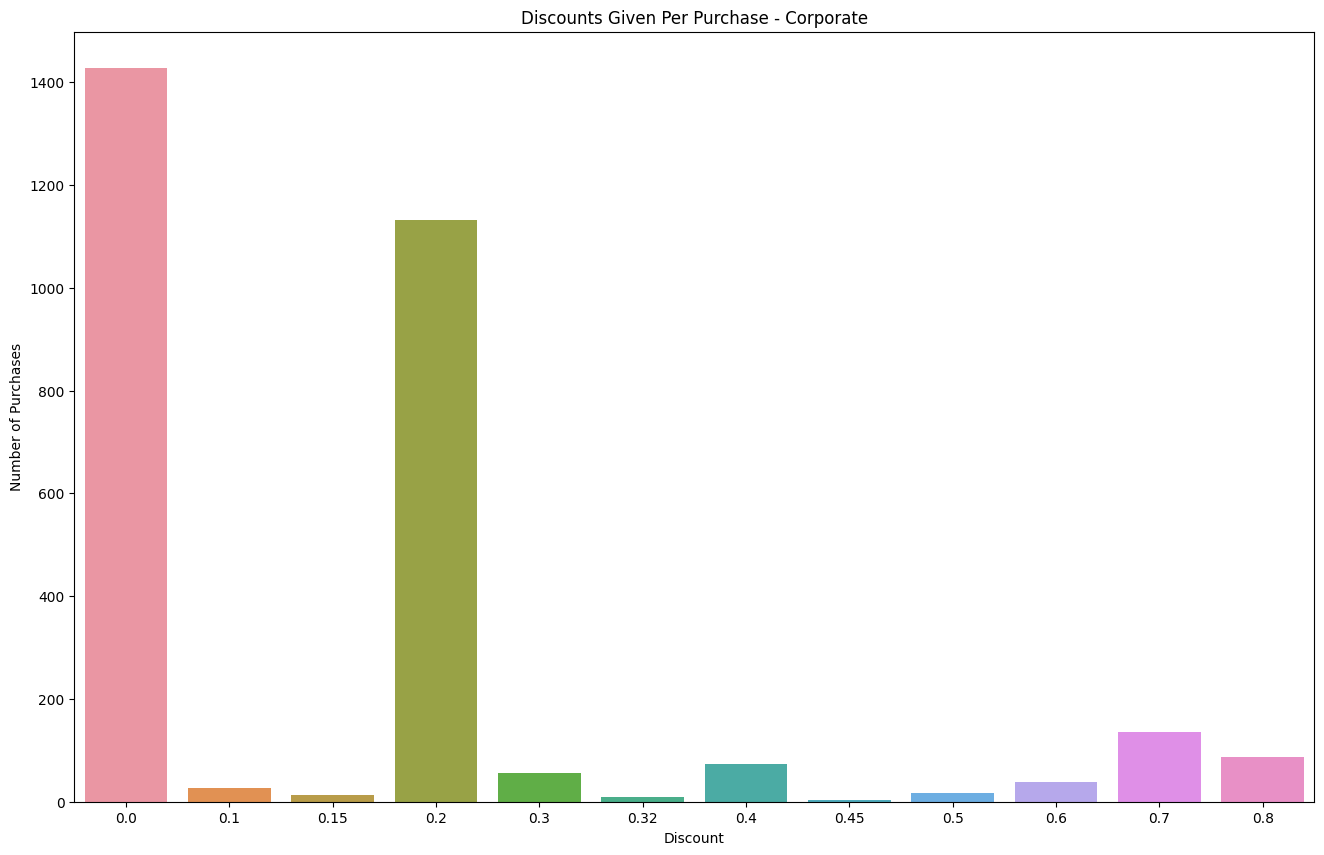

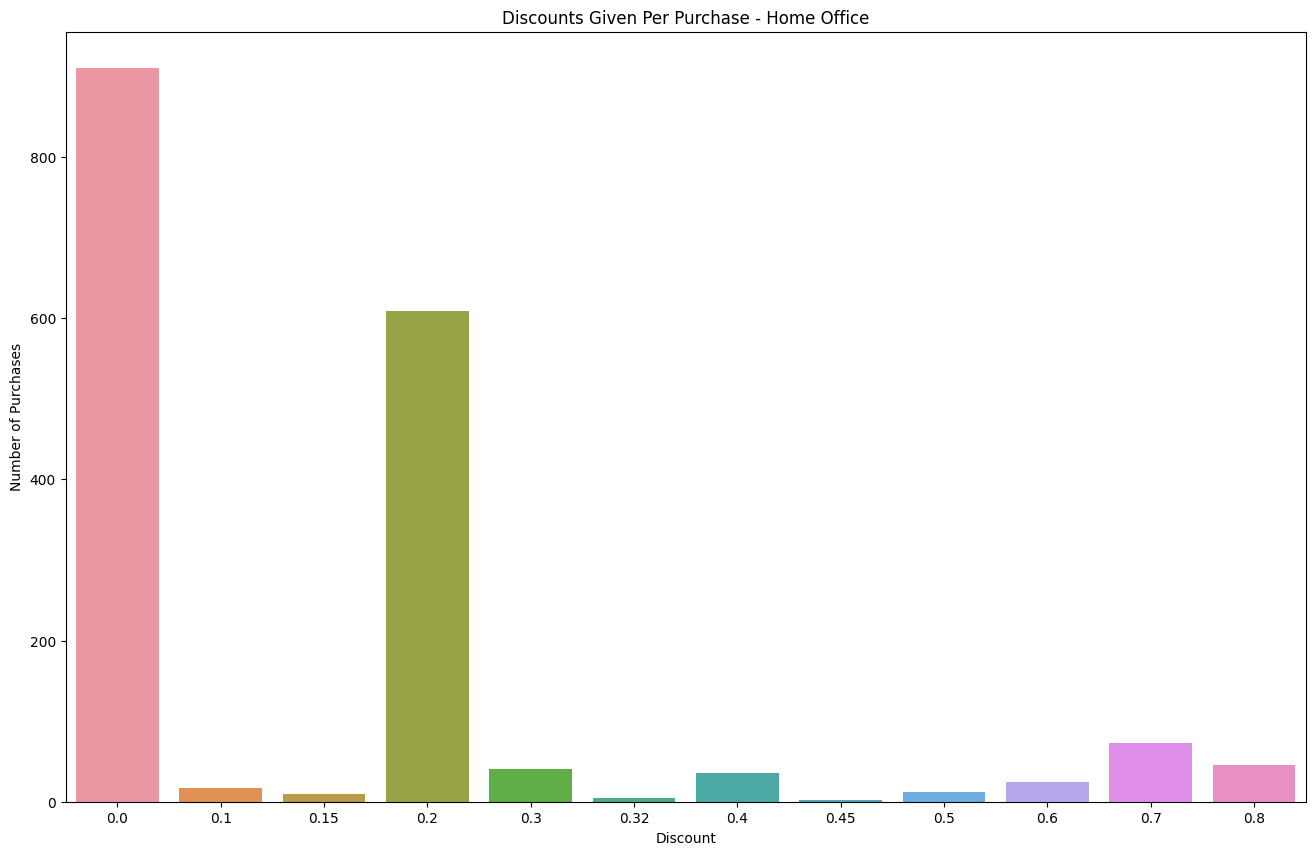

In [31]:
fig, ax = plt.subplots(figsize=(16, 10))
ax = sns.barplot(x=disc_by_segment.loc[idx['Consumer', :]].index, y=disc_by_segment.loc[idx['Consumer', :]].values)
ax.set(xlabel='Discount', ylabel='Number of Purchases', title='Discounts Given Per Purchase - Consumer')

fig, ax = plt.subplots(figsize=(16, 10))
ax = sns.barplot(x=disc_by_segment.loc[idx['Corporate', :]].index, y=disc_by_segment.loc[idx['Corporate', :]].values)
ax.set(xlabel='Discount', ylabel='Number of Purchases', title='Discounts Given Per Purchase - Corporate')

fig, ax = plt.subplots(figsize=(16, 10))
ax = sns.barplot(x=disc_by_segment.loc[idx['Home Office', :]].index, y=disc_by_segment.loc[idx['Home Office', :]].values)
ax.set(xlabel='Discount', ylabel='Number of Purchases', title='Discounts Given Per Purchase - Home Office')

_Inference_ : The discount is 0.0 for the maximum purchases for all the customer segments, followed by 0.2 or 20% discount. The rest of the discounts are more or less almost never given.

#### III. Shipping Modes by Segment

In [32]:
mode_by_segment = superstore.groupby(['Segment', 'Ship Mode'])['Ship Mode'].count()
mode_by_segment

Segment      Ship Mode     
Consumer     First Class        769
             Same Day           317
             Second Class      1020
             Standard Class    3085
Corporate    First Class        485
             Same Day           114
             Second Class       609
             Standard Class    1812
Home Office  First Class        284
             Same Day           112
             Second Class       316
             Standard Class    1071
Name: Ship Mode, dtype: int64

[Text(0.5, 0, 'Shipping Mode'),
 Text(0, 0.5, 'Number of Purchases'),
 Text(0.5, 1.0, 'Purchases as a function of Shipping Modes = Home Office')]

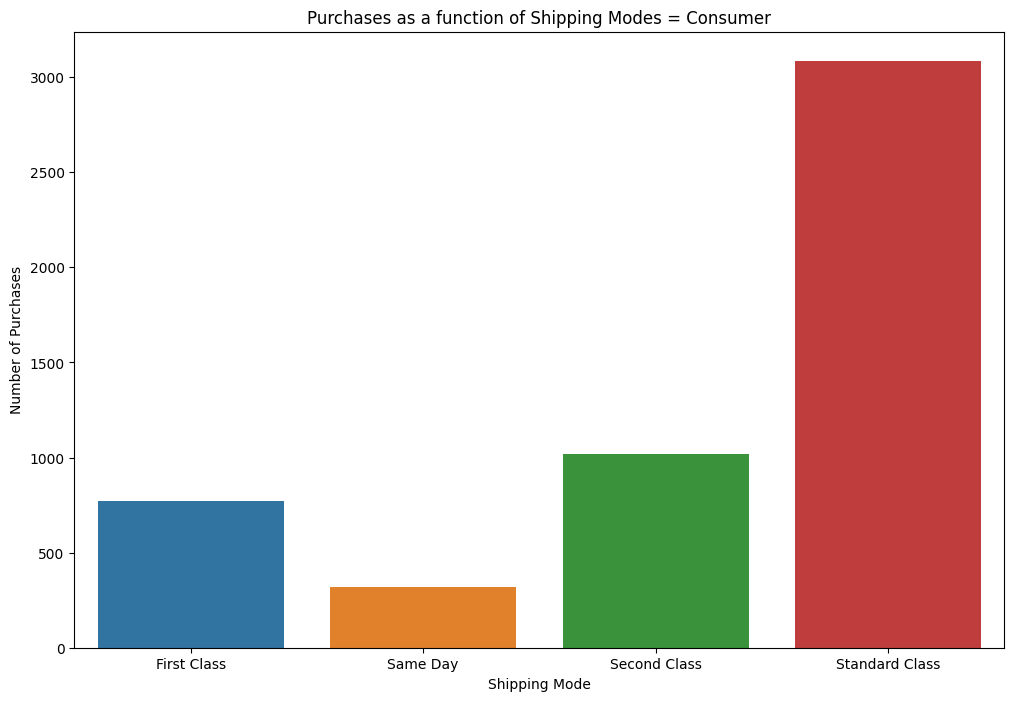

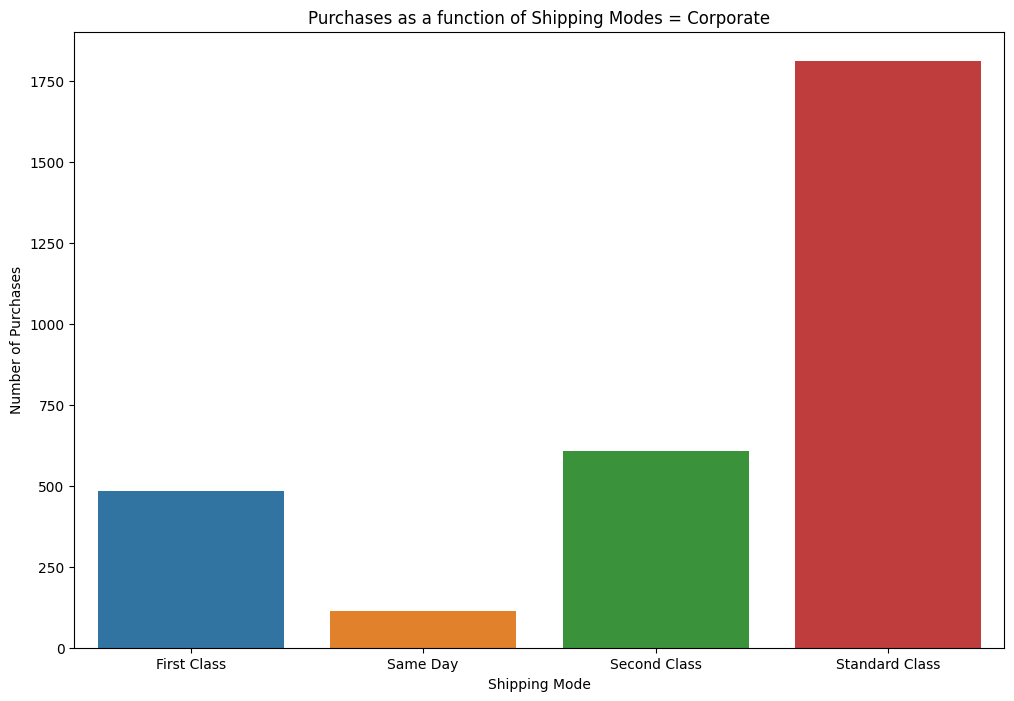

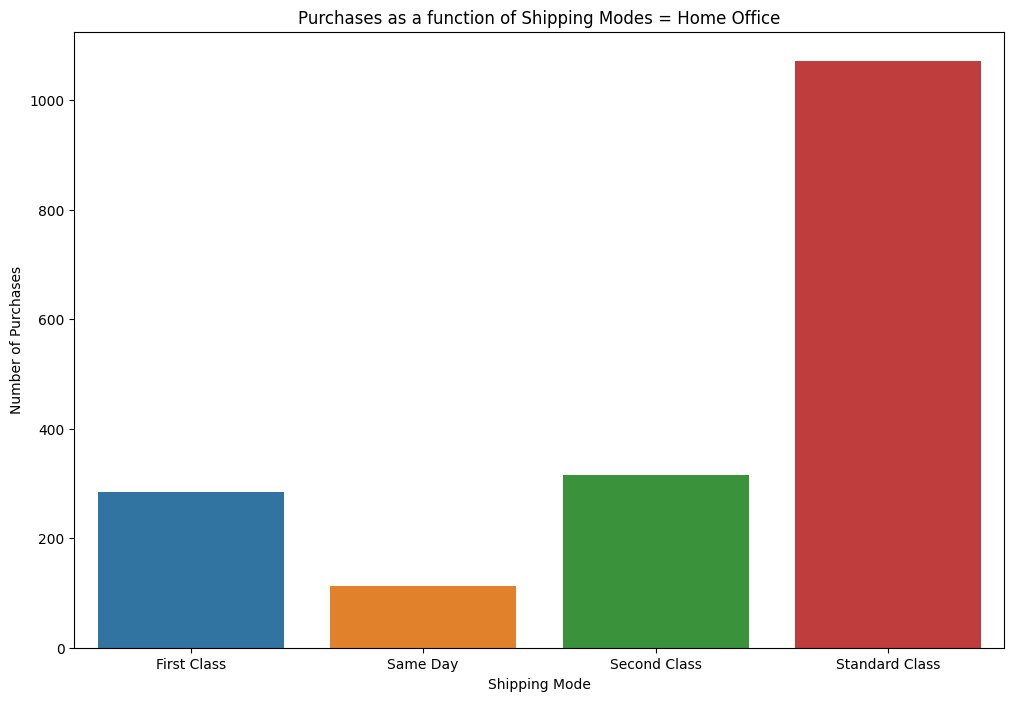

In [33]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.barplot(x=mode_by_segment.loc[idx['Consumer', :]].index, y=mode_by_segment.loc[idx['Consumer', :]].values)
ax.set(xlabel='Shipping Mode', ylabel='Number of Purchases', title='Purchases as a function of Shipping Modes = Consumer')

fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.barplot(x=mode_by_segment.loc[idx['Corporate', :]].index, y=mode_by_segment.loc[idx['Corporate', :]].values)
ax.set(xlabel='Shipping Mode', ylabel='Number of Purchases', title='Purchases as a function of Shipping Modes = Corporate')

fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.barplot(x=mode_by_segment.loc[idx['Home Office', :]].index, y=mode_by_segment.loc[idx['Home Office', :]].values)
ax.set(xlabel='Shipping Mode', ylabel='Number of Purchases', title='Purchases as a function of Shipping Modes = Home Office')

_Inference_ : For all of the 3 customer segments, the maximum number of purchases are in the 'Standard Class' shipping mode, followed by 'Second Class', 'First Class', and then 'Same Day'. 

### Highest Profit-Raking Customers

In [34]:
superstore.groupby(['Customer ID'])['Profit'].sum().sort_values(ascending=False).head(20)

Customer ID
TC-20980    8981.3239
RB-19360    6976.0959
SC-20095    5757.4119
HL-15040    5622.4292
AB-10105    5444.8055
TA-21385    4703.7883
CM-12385    3899.8904
KD-16495    3038.6254
AR-10540    2884.6208
DR-12940    2869.0760
TB-21400    2798.3689
NM-18445    2751.6849
SE-20110    2650.6769
BS-11365    2616.0644
HM-14860    2437.9836
TS-21370    2371.7144
BM-11650    2199.2781
CC-12370    2177.0493
JW-15220    2173.7094
HW-14935    2164.1611
Name: Profit, dtype: float64

In [35]:
superstore.groupby(['Customer ID'])['Profit'].sum().sort_values(ascending=True).head(20)

Customer ID
CS-12505   -6626.3895
GT-14635   -4108.6589
LF-17185   -3583.9770
SR-20425   -3333.9144
HG-14965   -2797.9635
NC-18415   -2204.8072
SB-20290   -2082.7451
SM-20320   -1980.7393
CP-12340   -1850.3029
NF-18385   -1695.9714
BM-11140   -1659.9581
TB-21520   -1603.0451
DC-12850   -1441.6313
DB-13120   -1421.7692
RO-19780   -1262.5716
TP-21415   -1087.3898
ZC-21910   -1032.1490
VP-21760   -1018.7768
SS-20410   -1010.9738
OT-18730    -925.1203
Name: Profit, dtype: float64

### Distribution of Profit by State

In [36]:
State_Code = ['AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']
profit_by_state = superstore.groupby('State')['Profit'].sum()
profit_by_state.sort_values(ascending=False)

State
California              76381.3871
New York                74038.5486
Washington              33402.6517
Michigan                24463.1876
Virginia                18597.9504
Indiana                 18382.9363
Georgia                 16250.0433
Kentucky                11199.6966
Minnesota               10823.1874
Delaware                 9977.3748
New Jersey               9772.9138
Wisconsin                8401.8004
Rhode Island             7285.6293
Maryland                 7031.1788
Massachusetts            6785.5016
Missouri                 6436.2105
Alabama                  5786.8253
Oklahoma                 4853.9560
Arkansas                 4008.6871
Connecticut              3511.4918
Nevada                   3316.7659
Mississippi              3172.9762
Utah                     2546.5335
Vermont                  2244.9783
Louisiana                2196.1023
Nebraska                 2037.0942
Montana                  1833.3285
South Carolina           1769.0566
New Hampshire 

In [37]:
fig = px.choropleth(locations=State_Code, locationmode="USA-states", color=profit_by_state.values, scope="usa", title='Distribution of Profit by State', template="simple_white")
fig.update_layout(coloraxis_colorbar_title_text = 'Profit')
fig.update_yaxes(showgrid=True)
fig.show()

_Inference_ : Maximum profits were raked in by 'California', 'Washington', 'New York', 'Michigan' and 'Virginia' in order.

### Distribution of Sales by State

In [38]:
superstore.groupby('State')['Sales'].sum().sort_values(ascending=False)

State
California              457687.6315
New York                310876.2710
Texas                   170188.0458
Washington              138641.2700
Pennsylvania            116511.9140
Florida                  89473.7080
Illinois                 80166.1010
Ohio                     78258.1360
Michigan                 76269.6140
Virginia                 70636.7200
North Carolina           55603.1640
Indiana                  53555.3600
Georgia                  49095.8400
Kentucky                 36591.7500
New Jersey               35764.3120
Arizona                  35282.0010
Wisconsin                32114.6100
Colorado                 32108.1180
Tennessee                30661.8730
Minnesota                29863.1500
Massachusetts            28634.4340
Delaware                 27451.0690
Maryland                 23705.5230
Rhode Island             22627.9560
Missouri                 22205.1500
Oklahoma                 19683.3900
Alabama                  19510.6400
Oregon                

In [39]:
fig = px.choropleth(locations=State_Code, locationmode="USA-states", color=superstore.groupby('State')['Sales'].sum().values, scope="usa",title='Distribution of Sales by State', template="simple_white")
fig.update_layout(coloraxis_colorbar_title_text = 'Sales')
fig.update_yaxes(showgrid=True)
fig.show()

_Inference_ : Maximum profits were raked in by 'California', 'New York', 'Texas', 'Washington', and 'Pennsylvania' in order.

### **Customer Segmentation**

In [45]:
superstore['Order Date'] = pd.to_datetime(superstore['Order Date'], format='%Y-%m-%d')
max_invoice_dates = superstore.groupby('Customer ID')['Order Date'].max()
recency = (pd.to_datetime(max(max_invoice_dates)) - pd.to_datetime(max_invoice_dates)).dt.days 
frequency = superstore.groupby('Customer ID')['Order ID'].nunique() 
monetary_value = superstore.groupby('Customer ID')['Sales'].sum() 

In [46]:
rfm = pd.concat([recency, frequency, monetary_value], axis=1)
rfm.columns = ['Recency', 'Frequency', 'MonetaryValue']
rfm

,Recency,Frequency,MonetaryValue
Customer ID,,,
AA-10315,184,5,5563.560
AA-10375,19,9,1056.390
AA-10480,259,4,1790.512
AA-10645,55,6,5086.935
AB-10015,415,3,886.156
...,...,...,...
XP-21865,43,11,2374.658
YC-21895,4,5,5454.350
YS-21880,9,8,6720.444


### _RFM Analysis:_ 
This technique segments customers based on three key metrics:

1. Recency: Number of days since the customer's last purchase.
2. Frequency: Number of purchases made by the customer.
3. Monetary Value: Total amount spent by the customer.

#### **STEPS:**
1. _Calculate RFM Scores:_ Calculate the RFM scores for each customer by assigning a score to each of the three metrics. For example, customers who made a purchase recently would receive a high recency score, while those who made frequent purchases would receive a high frequency score. The monetary value score can be based on the total amount spent.

2. _Customer Segmentation:_ Segment customers into groups based on their RFM scores. Typically, customers are divided into segments based on combinations of high or low scores. For example, "Best Customers" may have high scores across all three metrics, while "At Risk" customers may have low recency and frequency scores but a high monetary value score.

3. _K-means Clustering:_ Use the K-means clustering algorithm to group similar customers together based on their RFM scores. This unsupervised machine learning algorithm partitions the customers into clusters based on their similarities. The optimal number of clusters is determined using techniques like the elbow method.

4. _Assign Customers to Clusters:_ Assign each customer to a specific cluster based on their RFM scores and the clusters identified by the K-means algorithm. This provides a way to understand and target different customer segments effectively.

By performing RFM Analysis and applying K-means clustering, we can gain insights into customer behavior, identify valuable customer segments, and tailor marketing and retention strategies accordingly.

In [49]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

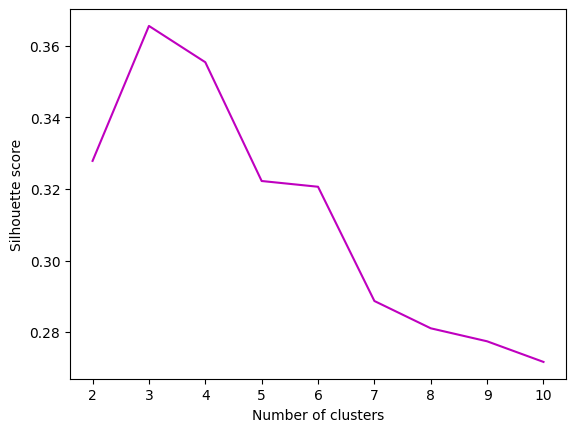

In [51]:
scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(rfm_scaled)
    score = silhouette_score(rfm_scaled, kmeans.labels_)
    scores.append(score)
plt.plot(range(2, 11), scores, color='m')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

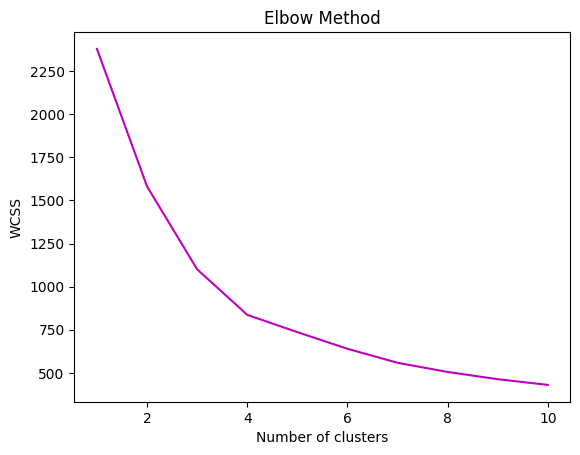

In [54]:
inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(rfm_scaled)
    inertias.append(kmeans.inertia_)
plt.plot(range(1, 11), inertias, color ='m')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### _Inference:_

As we can see from both the plots above, number of clusters = 3 has he highest RFM score, and also the WCSS decreases rapidly after 3 as we see in the elbow method graph. Hence, we take k=3 as our optimal parameter.

In [56]:
# Fit K-means algorithm on RFM data
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(rfm_scaled)
labels = kmeans.predict(rfm_scaled)

# Assign segment labels to each customer
rfm['Segment'] = labels
rfm

,Recency,Frequency,MonetaryValue,Segment
Customer ID,,,,
AA-10315,184,5,5563.560,0
AA-10375,19,9,1056.390,0
AA-10480,259,4,1790.512,0
AA-10645,55,6,5086.935,2
AB-10015,415,3,886.156,1
...,...,...,...,...
XP-21865,43,11,2374.658,2
YC-21895,4,5,5454.350,0
YS-21880,9,8,6720.444,2


#### **Segment-wise Recency, Frequency and Monetary Value Scores**

In [57]:
rfm[["Segment","Recency", "Frequency", "MonetaryValue"]].groupby("Segment").agg(["mean", "count","max"])

Recency             Frequency           MonetaryValue         
               mean count   max      mean count max          mean count   
Segment                                                                   
0         87.823129   441   386  5.512472   441   9   1843.926364   441  \
1        530.423423   111  1165  3.774775   111   9   1636.864907   111   
2         78.037344   241   410  8.958506   241  17   5403.889333   241   

                    
               max  
Segment             
0         6049.966  
1        10501.653  
2        25043.050

#### _Inference:_

The analysis includes customer segmentation using RFM (Recency, Frequency, Monetary) scores. The Loyal customer segment demonstrates the highest purchasing frequency and generates the most profit, while the Churned customer segment has the lowest RFM scores and generates the least profit. The focus should be on retaining Loyal customers and re-engaging Churned customers.

### _Further customer level analysis:_

#### _I. Most Frequent Buyers:_

In [77]:
superstore['Customer Name'].value_counts().head(10)

Customer Name
William Brown          37
John Lee               34
Matt Abelman           34
Paul Prost             34
Chloris Kastensmidt    32
Seth Vernon            32
Jonathan Doherty       32
Edward Hooks           32
Zuschuss Carroll       31
Emily Phan             31
Name: count, dtype: int64

#### _II. Number of Purchases by Customer Segments_

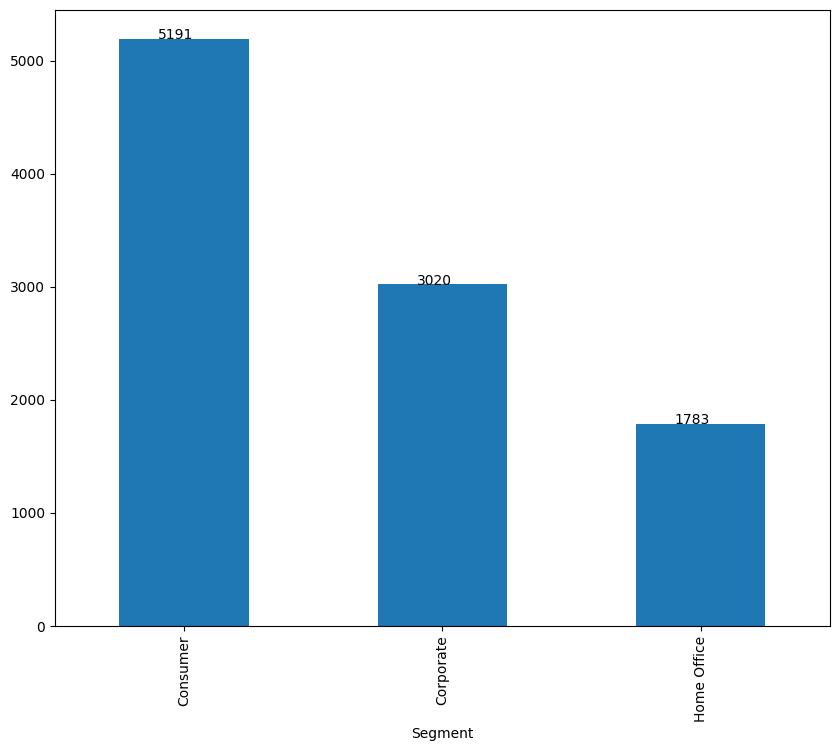

In [76]:
fig=plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
s=superstore.groupby('Segment')['Segment'].count().plot(kind='bar')
for s in ax.patches:
    ax.annotate('{:.0f}'.format(s.get_height()), (s.get_x()+0.15, s.get_height()+1))
plt.show()

#### _Inference:_
The distribution is highest in Consumer Segment.

#### _III. Top 20 Customers who benefitted the store_

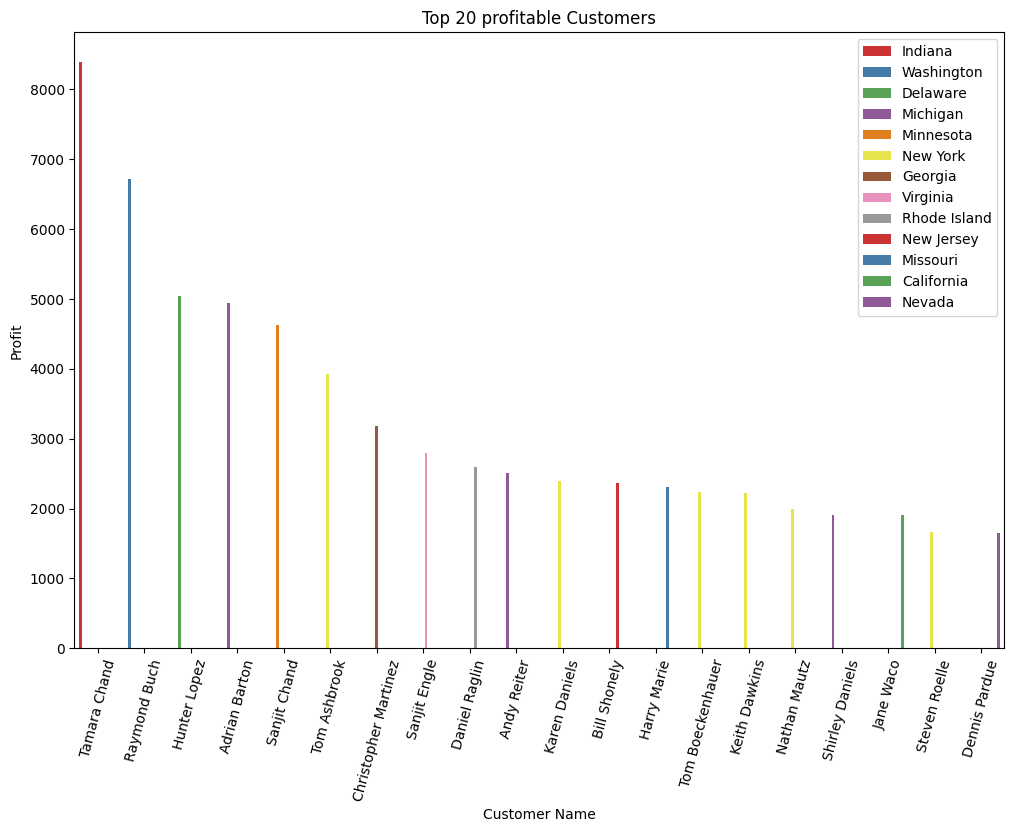

In [81]:
sortedTop20 = superstore.sort_values(['Profit'], ascending=False).head(20)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
p = sns.barplot(x='Customer Name', y='Profit',hue='State',palette='Set1', data=sortedTop20, ax=ax)
ax.set_title("Top 20 profitable Customers")
ax.set_xticklabels(p.get_xticklabels(), rotation=75)
ax.legend(loc='upper right')
plt.show()